# Markowitz Portfolio's Theory #

### Building the Efficient Frontier ###

In [33]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Optimization
from scipy.optimize import minimize

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from functions import import_daily_financial_data

In [34]:
# Import data
tickers = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA']      # Tickers

# DataFrame to store everything
df_returns = pd.DataFrame()

for ticker in tickers:
    df = import_daily_financial_data(
        ticker=ticker, 
        start_date='2015-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df['returns'].rename(ticker)
    
    df_returns = pd.concat([df_returns, returns], axis=1)
    
    print(f'Data Ready for {ticker}')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data Ready for AAPL
Data Ready for AMZN
Data Ready for META
Data Ready for MSFT


[*********************100%***********************]  1 of 1 completed

Data Ready for NVDA


In [35]:
df_returns

,AAPL,AMZN,META,MSFT,NVDA
2015-01-05,-0.028576,-0.020731,-0.016191,-0.009238,-0.017034
2015-01-06,0.000095,-0.023098,-0.013565,-0.014786,-0.030788
2015-01-07,0.013924,0.010544,0.000000,0.012625,-0.002609
2015-01-08,0.037703,0.006813,0.026309,0.028994,0.036927
2015-01-09,0.001072,-0.011818,-0.005644,-0.008441,0.004020
...,...,...,...,...,...
2024-12-24,0.011413,0.017573,0.013084,0.009330,0.003930
2024-12-26,0.003171,-0.008770,-0.007266,-0.002781,-0.002070
2024-12-27,-0.013331,-0.014641,-0.005884,-0.017453,-0.021088
2024-12-30,-0.013352,-0.011010,-0.014391,-0.013328,0.003497


In [36]:
# Theoretically, we could use the average as the expected returns (these are daily returns)
expected_returns = df_returns.mean()
expected_returns.name = 'mean_returns'

expected_returns

AAPL    0.000927
AMZN    0.001056
META    0.000801
MSFT    0.000935
NVDA    0.002238
Name: mean_returns, dtype: float64

In [37]:
# The volatility is calculated with the standard deviations (also daily volatilities)
volatility = df_returns.dropna().std()
volatility.name = 'volatility'

volatility

AAPL    0.017931
AMZN    0.020573
META    0.023847
MSFT    0.017091
NVDA    0.030376
Name: volatility, dtype: float64

In [38]:
# Covariance Matrix
cov_matrix = df_returns.dropna().cov()

cov_matrix

,AAPL,AMZN,META,MSFT,NVDA
AAPL,0.000322,0.000205,0.000224,0.000210,0.000298
AMZN,0.000205,0.000423,0.000290,0.000232,0.000324
META,0.000224,0.000290,0.000569,0.000237,0.000349
MSFT,0.000210,0.000232,0.000237,0.000292,0.000316
NVDA,0.000298,0.000324,0.000349,0.000316,0.000923


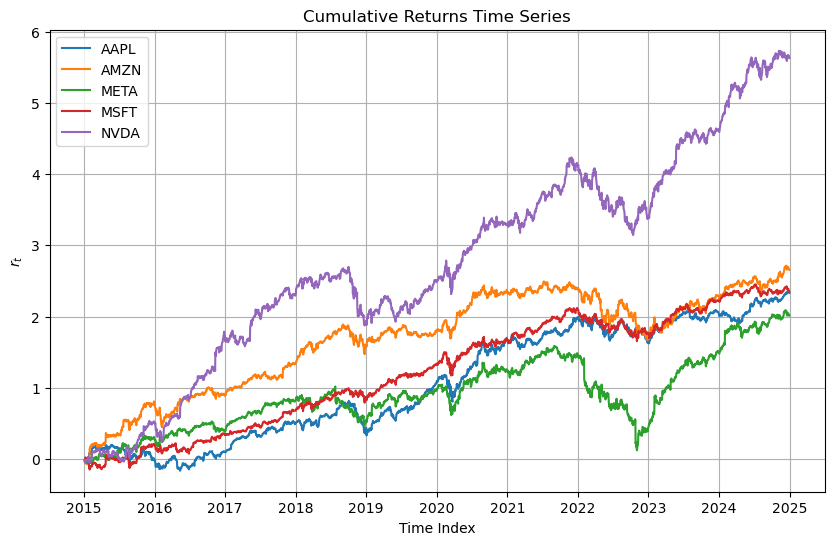

In [39]:
# Time Series Graphs
plt.figure(figsize=(10, 6))
plt.plot(df_returns.cumsum(), label=df_returns.columns, alpha=1)

# Config
plt.title('Cumulative Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('$r_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

The Markowitz's Theory establishes that a portfolio's returns and variance are defined by the following equations:

Portfolio Returns: $ \mu_P = \sum_{i=1}^{n}{\omega_i\mu_i} $

Portfolio Variance: $ \sigma_P^2 = \sum_{i=1}^{n}\sum_{j=1}^{n}\omega_i\omega_j\gamma_{ij}$

In [13]:
# To create random portfolios, first we need to create random weights:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

In [40]:
# An example
rand_weights(5)

array([0.12617207, 0.24637197, 0.2833872 , 0.32349778, 0.02057098])

In [41]:
### This function create a random portfolio based on random weights
def random_portfolio(
        expected_returns, 
        cov_matrix
):
    # Generate Random Weights
    weights = rand_weights(len(expected_returns))
    
    # Calculate the Portfolio's Returns
    portfolio_returns = np.dot(weights, expected_returns)
    
    # Calculate the Portfolio's Risk
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_stddev = np.sqrt(portfolio_variance)
    
    return portfolio_returns, portfolio_stddev

In [42]:
# Calculate a portfolio
returns_i, risk_i = random_portfolio(expected_returns, cov_matrix)

print(f"The Random Portfolio's Return is: {returns_i.round(3)}")
print(f"The Random Portfolio's Volatility is: {risk_i.round(3)}")

The Random Portfolio's Return is: 0.002
The Random Portfolio's Volatility is: 0.022


In [43]:
# We can use this function to generate several random portfolios
def generate_random_portfolios(
        n_portfolios, 
        expected_returns, 
        cov_matrix
):

    # Lists to store the portfolios' information
    means = []
    stds = []

    # Generate the portfolios
    for _ in range(n_portfolios):
        mean, std = random_portfolio(expected_returns.values.flatten(), cov_matrix)
        means.append(mean)
        stds.append(std)
    
    # Store them in a DataFrame
    portfolios = pd.DataFrame({
        'Mean Return': means,
        'Std Dev': stds
    })
    
    return portfolios

In [44]:
n_portfolios = 1000
portfolios = generate_random_portfolios(n_portfolios, expected_returns, cov_matrix)

portfolios

,Mean Return,Std Dev
0,0.001253,0.018806
1,0.001175,0.018003
2,0.001151,0.017946
3,0.001051,0.017207
4,0.001121,0.017608
...,...,...
995,0.001080,0.017531
996,0.001023,0.016249
997,0.001047,0.018231
998,0.001093,0.016675


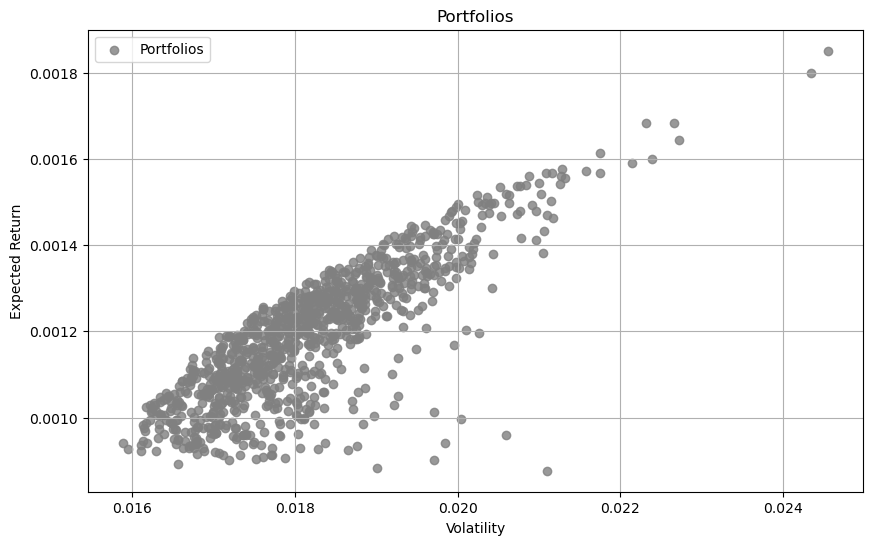

In [45]:
# Portfolios Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Std Dev'], portfolios['Mean Return'], color='gray', alpha=0.8, label='Portfolios')

# Config
plt.title('Portfolios')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Show
plt.grid(True)
plt.show()

In [46]:
# We can create the Equal-Weighted Portfolio to compare it with the other portfolios
def equal_weighted_portfolio(
        expected_returns, 
        cov_matrix
):
    # Generate the Equal Weights
    n = len(expected_returns)
    weights = np.ones(n) / n  

    # Calculate the Portfolio's Returns
    portfolio_return = np.dot(weights, expected_returns)
    
    # Calculate the Portfolio's Risk
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    return portfolio_return, portfolio_volatility

In [47]:
# Calculate the EWP
returns_e, risk_e = equal_weighted_portfolio(expected_returns, cov_matrix)

print(f"The Equal-Weighted Portfolio's Return is: {returns_e.round(3)}")
print(f"The Equal-Weighted Portfolio's Volatility is: {risk_e.round(3)}")

The Equal-Weighted Portfolio's Return is: 0.001
The Equal-Weighted Portfolio's Volatility is: 0.018


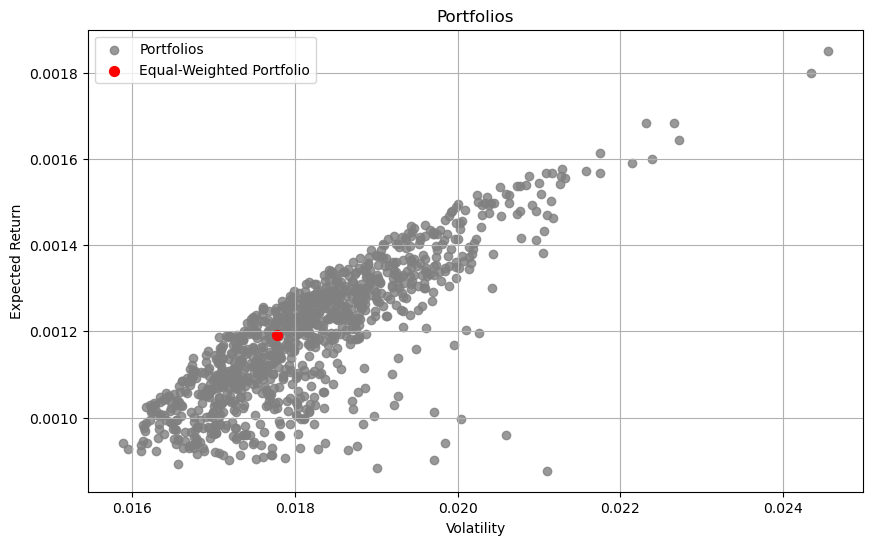

In [48]:
# Portfolios Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Std Dev'], portfolios['Mean Return'], color='gray', alpha=0.8, label='Portfolios')
plt.scatter(risk_e, returns_e, color='red', s=50, label='Equal-Weighted Portfolio')  


# Config
plt.title('Portfolios')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Show
plt.grid(True)
plt.show()

In [51]:
# Now how can we get the Efficient Frontier?

# Optimization functions
def portfolio_performance(
        weights, 
        expected_returns, 
        cov_matrix
):
    # Portfolio's Returns
    portfolio_return = np.dot(weights, expected_returns)

    #Portfolio's Volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    return portfolio_return, portfolio_volatility
    
# Minimizing Portfolio
def minimize_volatility(
        weights, 
        expected_returns, 
        cov_matrix
):
    return portfolio_performance(weights, expected_returns, cov_matrix)[1]

# Function that generates the portfolios that are located in the Efficient Frontier
def get_efficient_frontier(
        expected_returns, 
        cov_matrix, 
        num_portfolios=100
):
    results = np.zeros((2, num_portfolios))
    target_returns = np.linspace(expected_returns.min(), expected_returns.max(), num_portfolios)
    
    for i, target in enumerate(target_returns):
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},                          # weights must sum one
                       {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns) - target})   # portfolio returns
        bounds = tuple((-1, 1) for _ in range(len(expected_returns)))                           # no short if bounds [0,1]
        initial_guess = len(expected_returns) * [1. / len(expected_returns)]
        
        opt = minimize(minimize_volatility, initial_guess, args=(expected_returns, cov_matrix),
                       method='SLSQP', bounds=bounds, constraints=constraints)
        
        if opt.success:
            results[0, i] = target
            results[1, i] = opt.fun

    return results

In [53]:
# Calculate the EF
efficient_frontier = get_efficient_frontier(expected_returns, cov_matrix)

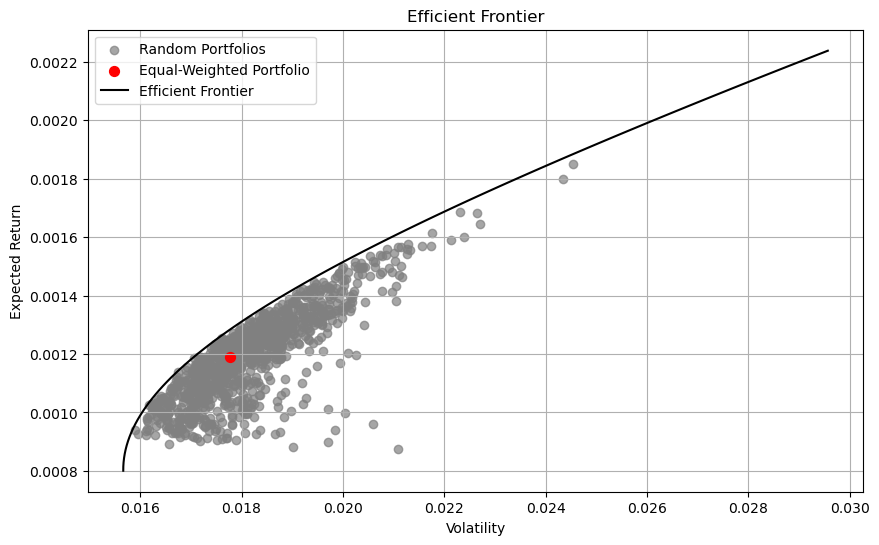

In [54]:
# Portfolios Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Std Dev'], portfolios['Mean Return'], color='gray', alpha=0.7, label='Random Portfolios')
plt.scatter(risk_e, returns_e, color='red', s=50, label='Equal-Weighted Portfolio')  
plt.plot(efficient_frontier[1, :], efficient_frontier[0, :], label='Efficient Frontier', color='black')


# Config
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Show
plt.grid(True)
plt.show()

The equation of the Efficient Frontier will have the next form:

1) $ \sigma_P^2 = \pi_0 - \pi_1\mu_P + \pi_2\mu_P^2 $

The coefficients of the equation will have the next form:

1) $ \pi_0 = \frac{A}{D} $
2) $ \pi_1 = \frac{2B}{D} $
3) $ \pi_2 = \frac{C}{D} $

The next equations define the components of the coefficients:

1) $ A = \mu^⊤\Sigma^{-1}\mu $
2) $ B = \mu^⊤\Sigma^{-1}\iota $
3) $ C = \iota^⊤\Sigma^{-1}\iota" $
4) $ D = AC-B^2 $


In [57]:
# So let us get the components
n = len(expected_returns)                                   # Number of Stocks
mu = expected_returns.values.flatten().reshape(-1, 1)       # Expected Returns
Sigma = cov_matrix.values                                   # Covariance Matrix
Sigma_inv = np.linalg.inv(Sigma)                            # Inverse Covariance Matrix
iota = np.ones((n, 1))                                      # Vector of Ones

In [58]:
# And now obtain the coefficients of the Efficient Frontier

A = np.dot(np.dot(mu.T, Sigma_inv), mu)
B = np.dot(np.dot(iota.T, Sigma_inv), mu)
C = np.dot(np.dot(iota.T, Sigma_inv), iota)
D = (A*C - B*B)

print(f"This is A: {A[0][0]}")
print(f"This is B: {B[0][0]}")
print(f"This is C: {C[0][0]}")
print(f"This is D: {D[0][0]}")

This is A: 0.0059032040758742015
This is B: 3.2704699375198416
This is C: 4090.059161192645
This is D: 13.448480298698003


In [59]:
# Then the equation
pi_0 = A/D
pi_1 = 2*B/D
pi_2 = C/D

print(f"This is the first coefficient: {pi_0[0][0]}")
print(f"This is the second coefficient: {pi_1[0][0]}")
print(f"This is the third coefficient: {pi_2[0][0]}")

This is the first coefficient: 0.00043894952773553995
This is the second coefficient: 0.4863701867989453
This is the third coefficient: 304.1279810320739


In [64]:
# Now let us get the values of the efficient frontier
def eff_equation(mu_P):
    return np.sqrt((pi_0 - pi_1 * mu_P + pi_2 * mu_P**2))

# Create a rango of values for mu_P
mu_P_values = np.linspace(0.0008, 0.002, 400)

# Evaluate the equation for mu_P values
sigma_P_values = eff_equation(mu_P_values).reshape(-1, 1)

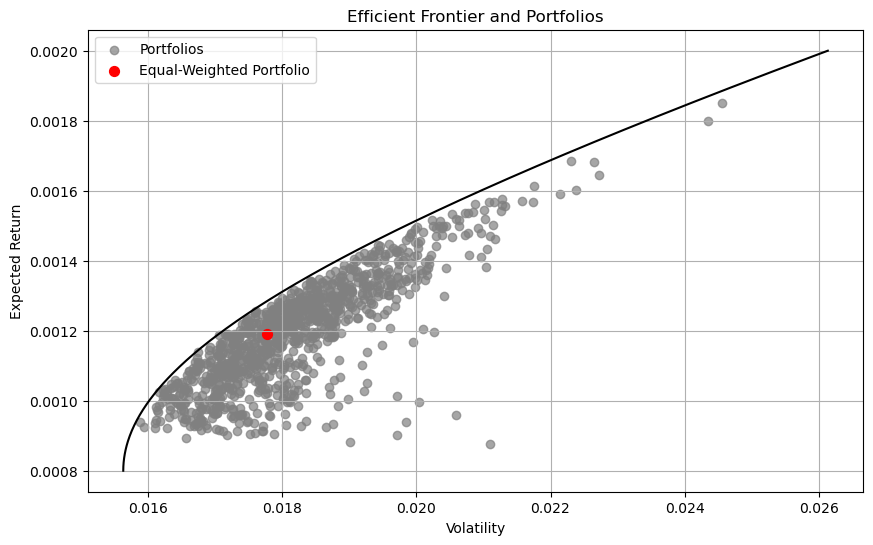

In [65]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Std Dev'], portfolios['Mean Return'], color='grey', alpha=0.7, label='Portfolios')
plt.scatter(risk_e, returns_e, color='red', s=50, label='Equal-Weighted Portfolio') 
plt.plot(sigma_P_values, mu_P_values, color='black')


# Config
plt.title('Efficient Frontier and Portfolios')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Show
plt.grid(True)
plt.show()


In [66]:
# Let us check if this equation is indeed correct; for the equal-weighted portfolio's volatility
risk_e_optimal = eff_equation(returns_e)[0][0]

print(f"The Equal-Weighted Portfolio's Returns: {returns_e}")
print(f"The Equal-Weighted Portfolio's Volatility: {risk_e}")
print(f"The Optimal Volatility: {risk_e_optimal}")

The Equal-Weighted Portfolio's Returns: 0.0011910881568796138
The Equal-Weighted Portfolio's Volatility: 0.01777407142586651
The Optimal Volatility: 0.017061752171026796


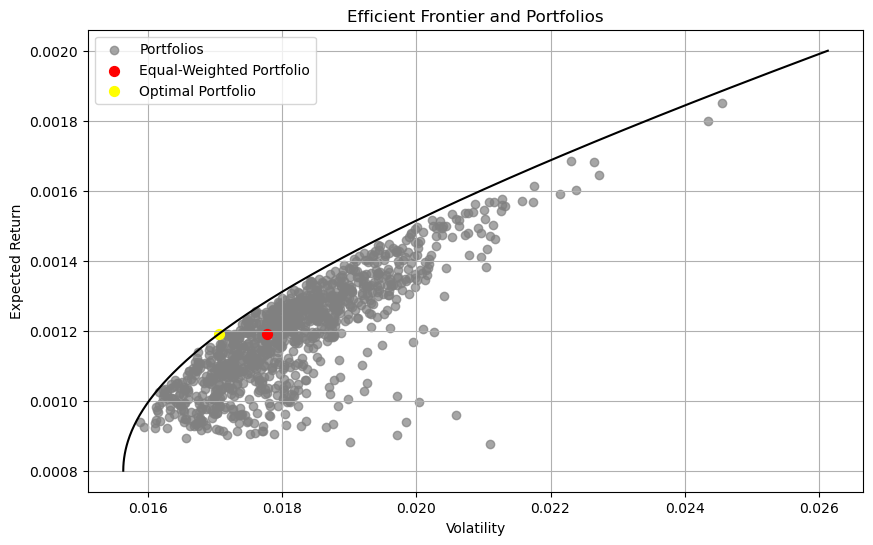

In [67]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Std Dev'], portfolios['Mean Return'], color='grey', alpha=0.7, label='Portfolios')
plt.scatter(risk_e, returns_e, color='red', s=50, label='Equal-Weighted Portfolio')  
plt.plot(sigma_P_values, mu_P_values, color='black')
plt.scatter(risk_e_optimal, returns_e, color='yellow', s=50, label='Optimal Portfolio') 

# Config
plt.title('Efficient Frontier and Portfolios')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Show
plt.grid(True)
plt.show()


To find the minimum variance portfolio we can use the following equation:

Returns: $ \mu_{P_{min}} = \frac{\pi_1}{2\pi_2} $

Variance: $ \sigma_{P_{min}}^2 = \pi_0 - \frac{\pi_1^2}{4\pi_2} $ 

In [69]:
# Get the MVP
min_returns = pi_1/(2*pi_2)
min_volat = np.sqrt(pi_0 - ((pi_1**2)/(4*pi_2)))

print(f"The MVP Returns are: {min_returns[0][0]}")
print(f"The MVP Volatility is: {min_volat[0][0]}")

The MVP Returns are: 0.000799614335301249
The MVP Volatility is: 0.01563634359182953


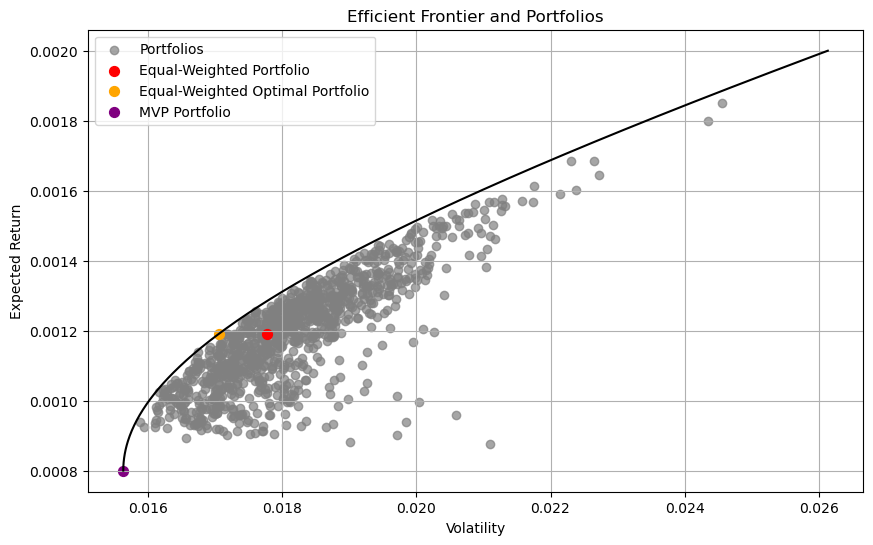

In [70]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Std Dev'], portfolios['Mean Return'], color='grey', alpha=0.7, label='Portfolios')
plt.scatter(risk_e, returns_e, color='red', s=50, label='Equal-Weighted Portfolio')  
plt.plot(sigma_P_values, mu_P_values, color='black')
plt.scatter(risk_e_optimal, returns_e, color='orange', s=50, label='Equal-Weighted Optimal Portfolio') 
plt.scatter(min_volat, min_returns, color='purple', s=50, label='MVP Portfolio') 

# Config
plt.title('Efficient Frontier and Portfolios')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Show
plt.grid(True)
plt.show()